<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/ForecastingRoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Ross Data




In [1]:
# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/rossman_train.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

### Packages

In [2]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates
import numpy as np
import pandas as pd
import scipy as sp
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

### Data Processing

In [3]:
# Loading our Datasets
ross_data = pd.read_csv("rossman_train.csv", parse_dates = True, low_memory = False)

In [4]:
ross_data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
ross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
ross_data["DayOfWeek"] = ross_data["DayOfWeek"].astype("category")
ross_data["Open"] = ross_data["Open"].astype("category")
ross_data["Promo"] = ross_data["Promo"].astype("category")
ross_data["StateHoliday"] = ross_data["StateHoliday"].astype("category")
ross_data["SchoolHoliday"] = ross_data["SchoolHoliday"].astype("category")

In [6]:
ross_data["Date"] = pd.to_datetime(ross_data.Date, format='%Y-%m-%d', errors='ignore')

In [7]:
ross_data["Sales_Per_Customer"] = ross_data["Sales"] / ross_data["Customers"]

In [8]:
ross_data["Year"] = ross_data["Date"].dt.year
ross_data["Month"] = ross_data["Date"].dt.month
ross_data["Day"] = ross_data["Date"].dt.day

### Profiler

In [ ]:
%pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile =  ProfileReport(ross_data)

In [ ]:
profile.to_file("/content/output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

###EDA

####Sales

In [ ]:
len(ross_data[ross_data.Sales == 0])

172871

<Figure size 1000x600 with 0 Axes>

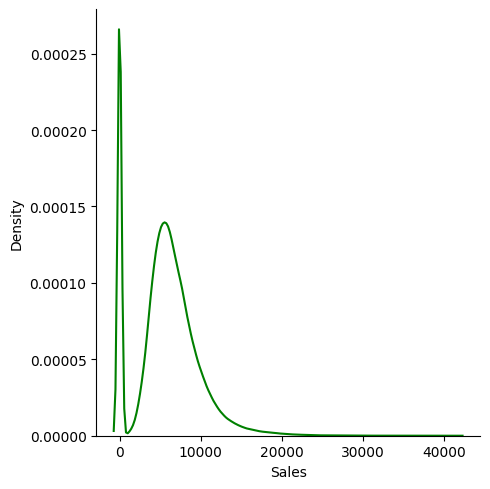

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
sns.displot(ross_data.Sales, kind = "kde", color="green")


In [ ]:
"""
Many Records have Zero Sales, Need to analyze these records separately
"""

'\nMany Records have Zero Sales, Need to analyze these records separately\n'

####Non Zero Sales

<Figure size 1000x600 with 0 Axes>

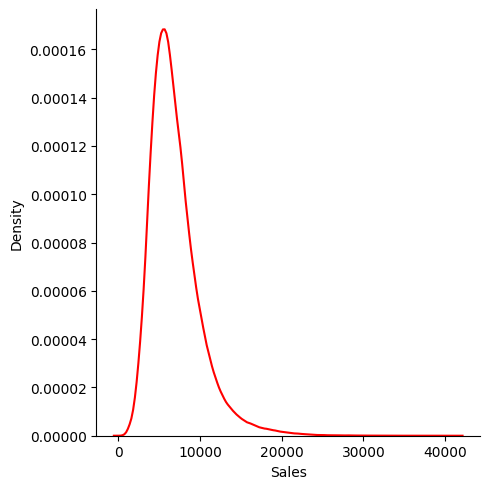

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
sns.displot(ross_data[ross_data.Sales != 0].Sales, kind = "kde", color="red")

In [ ]:
"""
Non zero sales show long tail.
"""

'\nNon zero sales show long tail.\n'

<Figure size 1000x600 with 0 Axes>

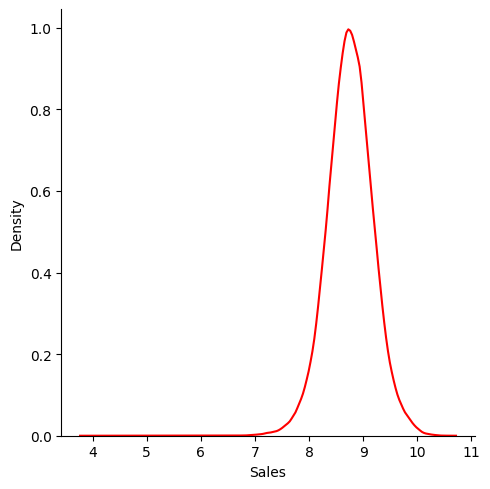

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
sns.displot(np.log1p(ross_data[ross_data.Sales != 0].Sales), kind = "kde", color="red")

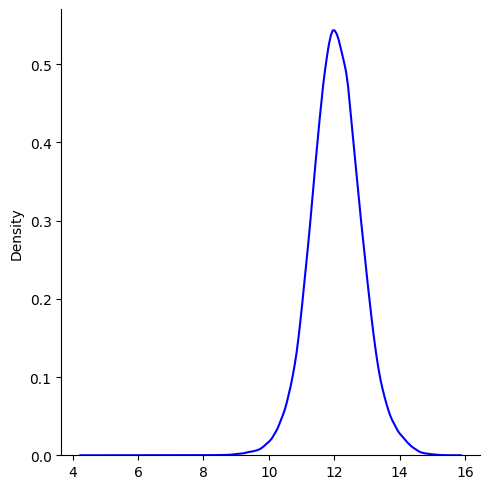

In [ ]:
from scipy import stats
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(ross_data[ross_data.Sales != 0].Sales)
sns.displot(fitted_data, kind = "kde", color="blue")

In [ ]:
fitted_lambda

0.06934016397958204

In [ ]:
"""
For lambda = 0.069 Box-Cox can give the transformation
"""

'\nFor lambda = 0.069 Box-Cox can give the transformation\n'

###Store Count Frequency

<Figure size 1000x600 with 0 Axes>

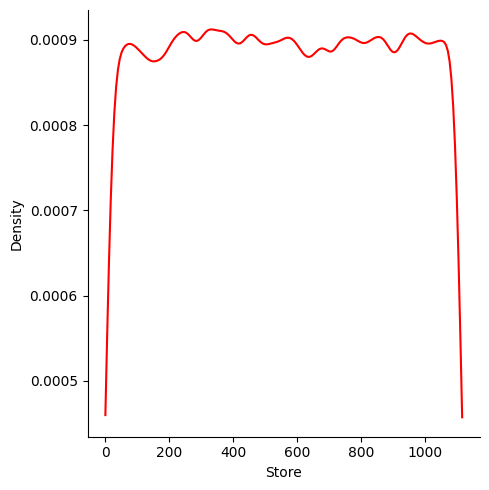

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
sns.displot(ross_data[ross_data.Sales != 0].Store, kind = "kde", color="red", cut = 0)

In [ ]:
"""
Store Records with uniform
"""

'\nStore Records with uniform\n'

###Customer Freq Count

<Figure size 1000x600 with 0 Axes>

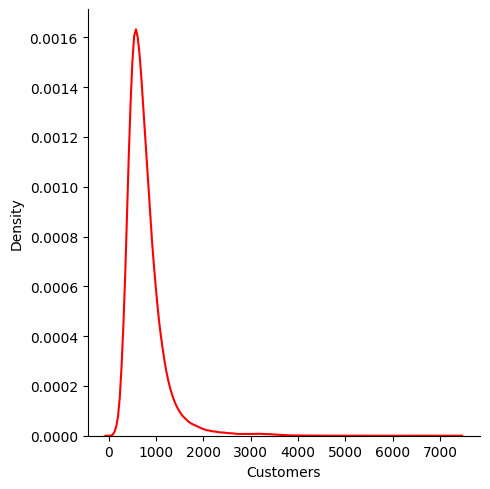

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
sns.displot(ross_data[ross_data.Sales != 0].Customers, kind = "kde", color="red")

In [ ]:
"""
The Data is skewed...,
"""

###Relatioship Analysis

In [ ]:
ross_data["DayOfWeek"] = ross_data["DayOfWeek"].astype("category")
ross_data["Open"] = ross_data["Open"].astype("category")
ross_data["Promo"] = ross_data["Promo"].astype("category")
ross_data["StateHoliday"] = ross_data["StateHoliday"].astype("category")
ross_data["SchoolHoliday"] = ross_data["SchoolHoliday"].astype("category")

####DayOfWeek vs Sales

<Axes: xlabel='Sales', ylabel='DayOfWeek'>

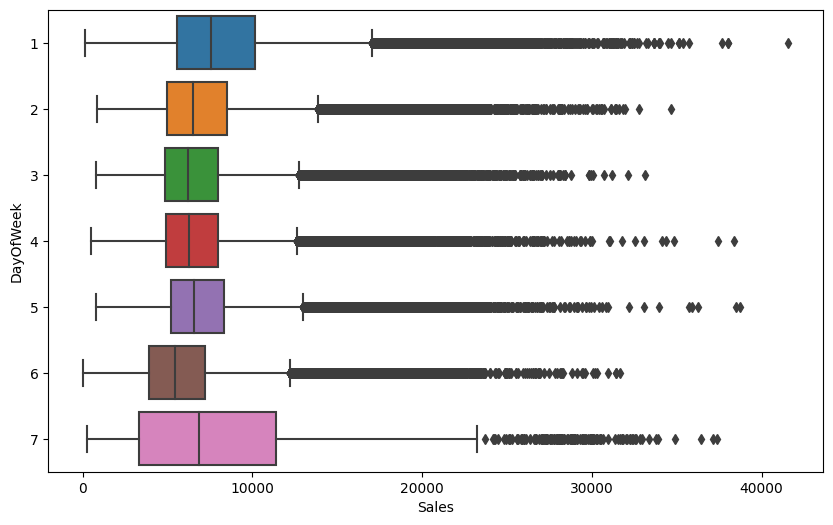

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data[ross_data.Sales != 0], x="Sales", y="DayOfWeek")

####Open vs Sales

<Axes: xlabel='Sales', ylabel='Open'>

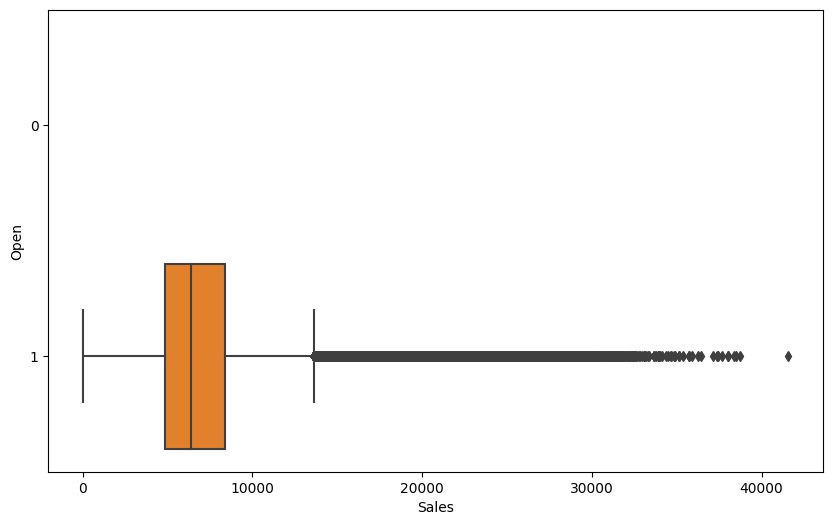

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data[ross_data.Sales != 0], x="Sales", y="Open")

####Promo vs Sales

<Axes: xlabel='Sales', ylabel='Promo'>

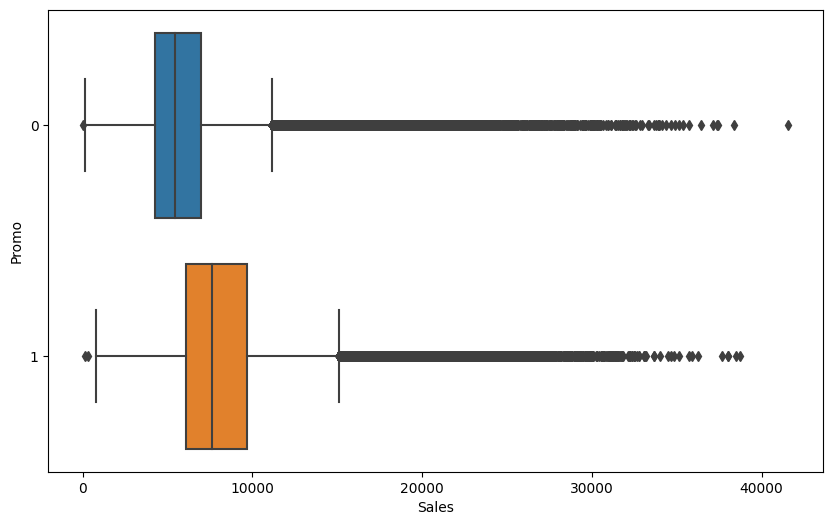

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data[ross_data.Sales != 0], x="Sales", y="Promo")

####StateHoliday vs Sales

<Axes: xlabel='Sales', ylabel='StateHoliday'>

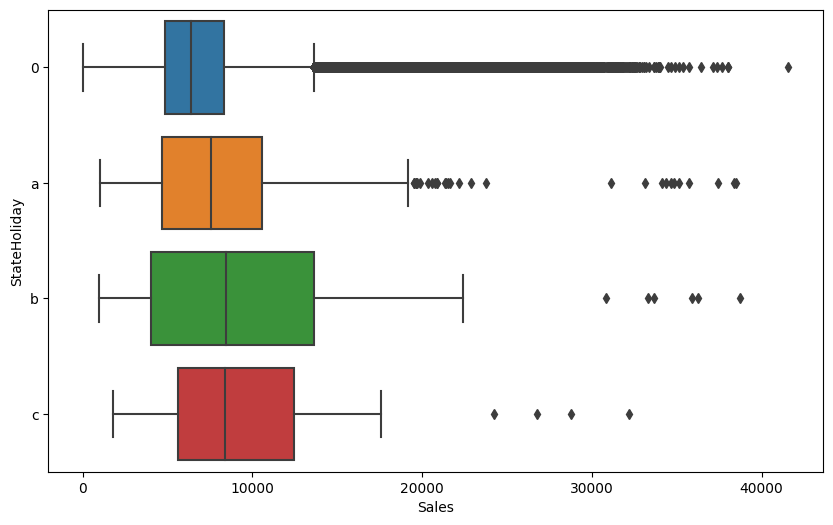

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data[ross_data.Sales != 0], x="Sales", y="StateHoliday")

####SchoolHoliday vs Sales

<Axes: xlabel='Sales', ylabel='SchoolHoliday'>

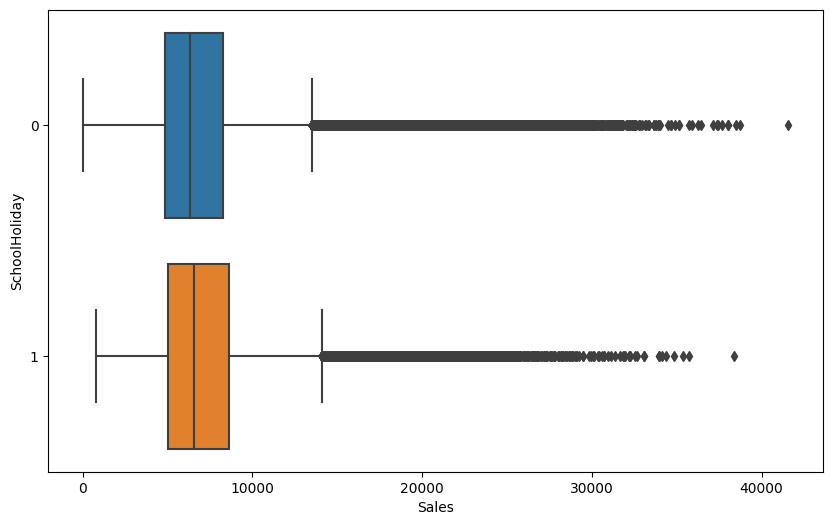

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data[ross_data.Sales != 0], x="Sales", y="SchoolHoliday")

In [ ]:
sns.catplot(data= ross_data[ross_data.Sales != 0] , x="SchoolHoliday", y="Sales", kind="swarm")

In [ ]:
#sns.pairplot(ross_data[['DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday' ]], kind="reg", diag_kind="kde")

### Sales Fitting Model

#### Linear Model

In [ ]:
ross_data.describe(include="all")

Store  DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1017209.0     1017209  1.017209e+06  1.017209e+06   
unique           NaN        7.0         942           NaN           NaN   
top              NaN        4.0  2015-07-31           NaN           NaN   
freq             NaN   145845.0        1115           NaN           NaN   
mean    5.584297e+02        NaN         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02        NaN         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00        NaN         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02        NaN         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02        NaN         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02        NaN         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03        NaN         NaN  4.155100e+04  7.388000e+03   

             Open      Promo StateHoliday  SchoolHoliday  
count   1017209.0  1017209.0      1017209      1017209.0  
unique        2.0        2.0            4            2.0  
top           1.0        0.0            0            0.0  
freq     844392.0   629129.0       986159       835488.0  
mean          NaN        NaN          NaN            NaN  
std           NaN        NaN          NaN            NaN  
min           NaN        NaN          NaN            NaN  
25%           NaN        NaN          NaN            NaN  
50%           NaN        NaN          NaN            NaN  
75%           NaN        NaN          NaN            NaN  
max           NaN        NaN          NaN            NaN

In [ ]:
ross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   Store          1017209 non-null  int64   
 1   DayOfWeek      1017209 non-null  category
 2   Date           1017209 non-null  object  
 3   Sales          1017209 non-null  int64   
 4   Customers      1017209 non-null  int64   
 5   Open           1017209 non-null  category
 6   Promo          1017209 non-null  category
 7   StateHoliday   1017209 non-null  category
 8   SchoolHoliday  1017209 non-null  category
dtypes: category(5), int64(3), object(1)
memory usage: 35.9+ MB


In [ ]:
ross_data.head()

Store DayOfWeek        Date  Sales  Customers Open Promo StateHoliday  \
0      1         5  2015-07-31   5263        555    1     1            0   
1      2         5  2015-07-31   6064        625    1     1            0   
2      3         5  2015-07-31   8314        821    1     1            0   
3      4         5  2015-07-31  13995       1498    1     1            0   
4      5         5  2015-07-31   4822        559    1     1            0   

  SchoolHoliday  
0             1  
1             1  
2             1  
3             1  
4             1

In [ ]:
predictor_columns = ["DayOfWeek",	"Promo",	"StateHoliday", "SchoolHoliday"]
X = ross_data[ross_data.Sales != 0][predictor_columns]
y = ross_data[ross_data.Sales != 0].Sales.ravel()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["DayOfWeek", "Promo", "StateHoliday", "SchoolHoliday"]

preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['DayOfWeek', 'Promo',
                                                   'StateHoliday',
                                                   'SchoolHoliday'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [ ]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $",
    "MedAE on testing set": f"{mae_test:.2f} $",
}

scores

{'MedAE on training set': '1495.68 $', 'MedAE on testing set': '1491.64 $'}

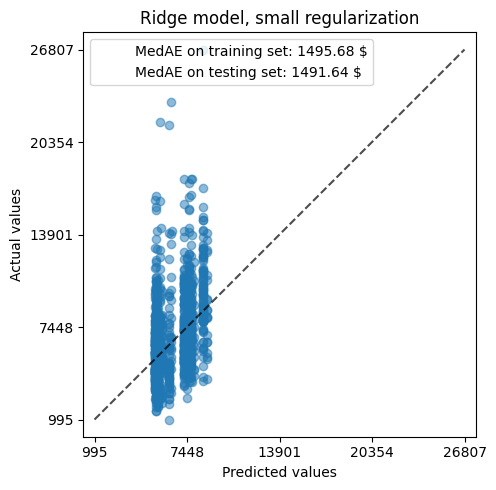

In [ ]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [ ]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

Coefficients
DayOfWeek_1          0.045190
DayOfWeek_2         -0.010410
DayOfWeek_3         -0.029350
DayOfWeek_4         -0.028090
DayOfWeek_5         -0.001752
DayOfWeek_6         -0.023118
DayOfWeek_7          0.047530
Promo_0             -0.072077
Promo_1              0.072077
StateHoliday_0      -0.079685
StateHoliday_a      -0.042988
StateHoliday_b       0.001585
StateHoliday_c       0.121089
SchoolHoliday_0     -0.006129
SchoolHoliday_1      0.006129

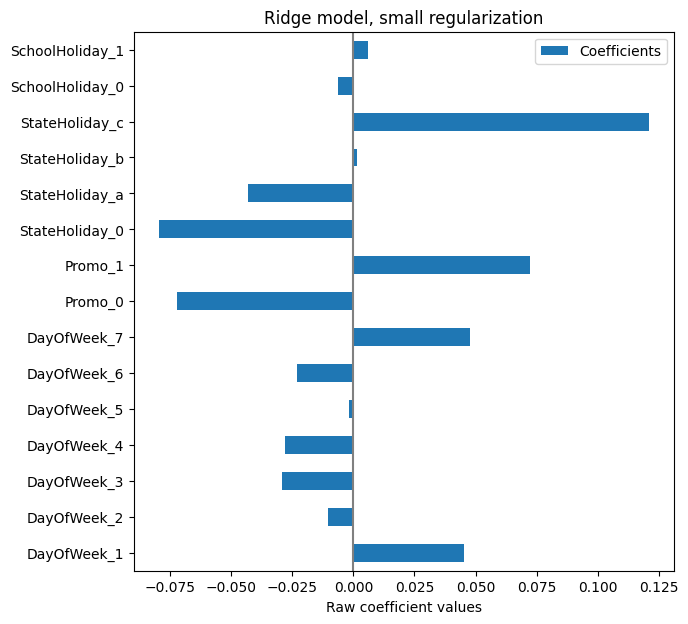

In [ ]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [ ]:
model[:-1]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['DayOfWeek', 'Promo',
                                                   'StateHoliday',
                                                   'SchoolHoliday'])],
                                   verbose_feature_names_out=False))])

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_validate

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

In [ ]:
cv_model["estimator"][0]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['DayOfWeek', 'Promo',
                                                   'StateHoliday',
                                                   'SchoolHoliday'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [ ]:
coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names,
)

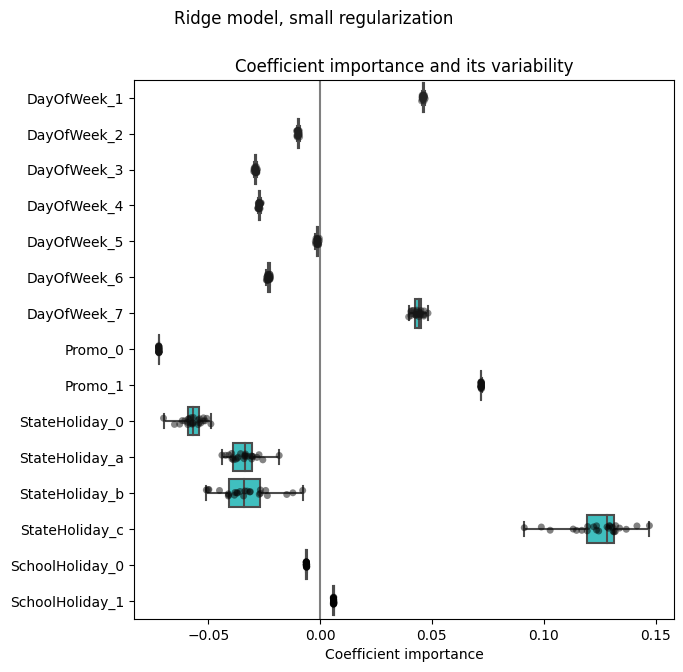

In [ ]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge model, small regularization")
plt.subplots_adjust(left=0.3)

#### Regressor Tree

In [ ]:
predictor_columns = ["DayOfWeek",	"Promo", "StateHoliday",	"SchoolHoliday"]
X = ross_data[ross_data.Sales != 0][predictor_columns]
y = ross_data[ross_data.Sales != 0].Sales.ravel()

In [ ]:
factor_state_holiday_code, unique_state_codes = pd.factorize(X["StateHoliday"])

In [ ]:
X["StateHoliday"] = factor_state_holiday_code

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

<Axes: >

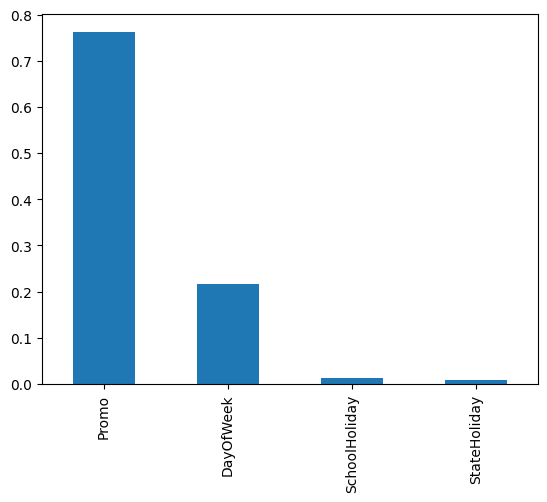

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [ ]:
"Test Score", rf_model.score(X_test, y_test)

('Test Score', 0.1771249761171696)

### Per Customer Sales Analysis / Fitting the Model

#### Linear Model

<Figure size 1000x600 with 0 Axes>

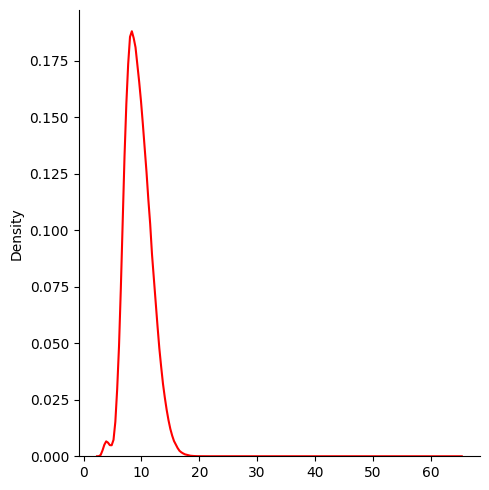

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
sns.displot(ross_data[ross_data.Sales != 0].Sales/ross_data[ross_data.Sales != 0].Customers, kind = "kde", color="red")

<Figure size 1000x600 with 0 Axes>

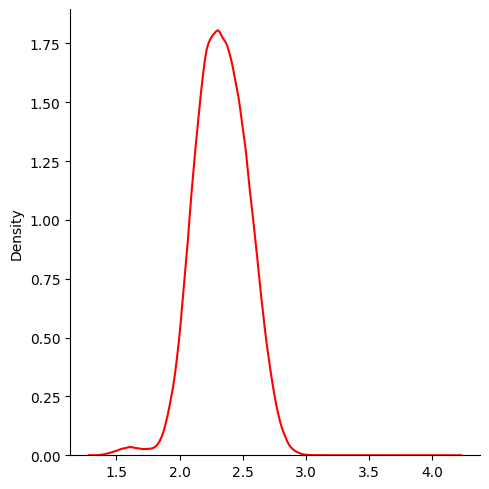

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
sns.displot(np.log1p(ross_data[ross_data.Sales != 0].Sales/ross_data[ross_data.Sales != 0].Customers), kind = "kde", color="red")

In [ ]:
predictor_columns = ["DayOfWeek",	"Promo",	"StateHoliday", "SchoolHoliday"]
X = ross_data[ross_data.Sales != 0][predictor_columns]
y = (ross_data[ross_data.Sales != 0].Sales / ross_data[ross_data.Sales != 0].Customers)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["DayOfWeek", "Promo", "StateHoliday", "SchoolHoliday"]

preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

ratio_model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)

In [ ]:
ratio_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['DayOfWeek', 'Promo',
                                                   'StateHoliday',
                                                   'SchoolHoliday'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [ ]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y_train, ratio_model.predict(X_train))
y_pred = ratio_model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $",
    "MedAE on testing set": f"{mae_test:.2f} $",
}

scores

{'MedAE on training set': '1.42 $', 'MedAE on testing set': '1.42 $'}

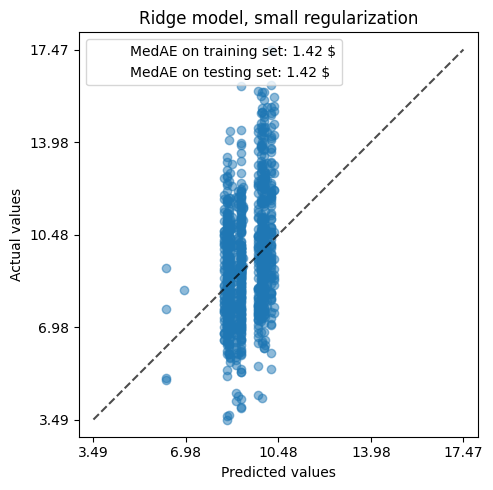

In [ ]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [ ]:
feature_names = ratio_model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    ratio_model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

Coefficients
DayOfWeek_1          0.029756
DayOfWeek_2          0.018294
DayOfWeek_3          0.014320
DayOfWeek_4          0.007971
DayOfWeek_5          0.013487
DayOfWeek_6          0.038784
DayOfWeek_7         -0.122612
Promo_0             -0.030754
Promo_1              0.030754
StateHoliday_0       0.106717
StateHoliday_a      -0.001273
StateHoliday_b      -0.079737
StateHoliday_c      -0.025707
SchoolHoliday_0     -0.002418
SchoolHoliday_1      0.002418

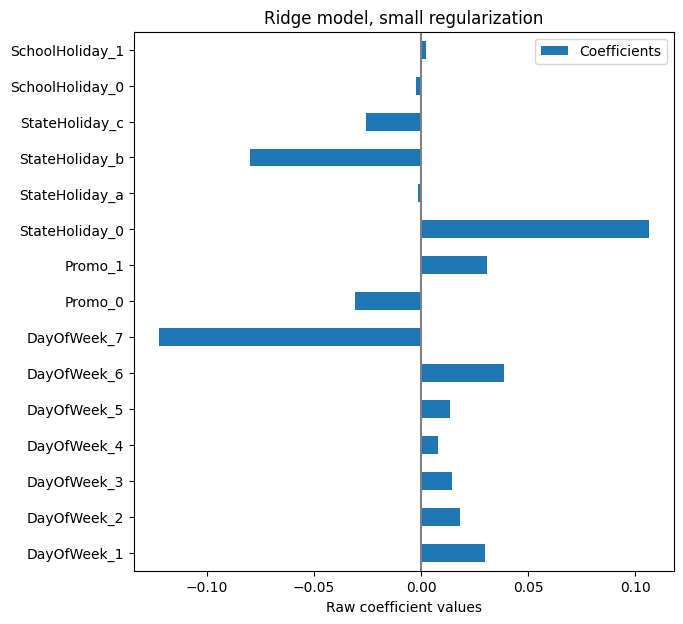

In [ ]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_validate

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    ratio_model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

In [ ]:
coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names,
)

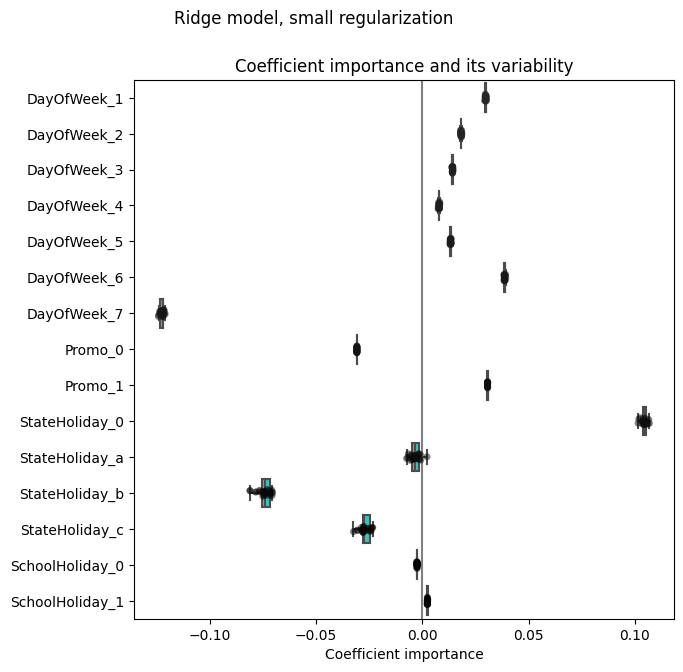

In [ ]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge model, small regularization")
plt.subplots_adjust(left=0.3)

#### Regression Tree Model

In [ ]:
predictor_columns = ["DayOfWeek",	"Promo", "StateHoliday",	"SchoolHoliday"]
X = ross_data[ross_data.Sales != 0][predictor_columns]
y = (ross_data[ross_data.Sales != 0].Sales / ross_data[ross_data.Sales != 0].Customers)

In [ ]:
factor_state_holiday_code, unique_state_codes = pd.factorize(X["StateHoliday"])
X["StateHoliday"] = factor_state_holiday_code

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

<Axes: >

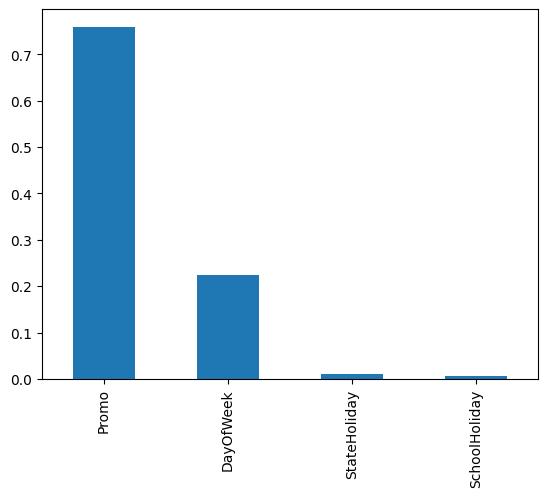

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [ ]:
"Test Score", rf_model.score(X_test, y_test)

('Test Score', 0.10277548159839545)

### Time Series Plot

In [ ]:
ross_data.head()

Store DayOfWeek        Date  Sales  Customers Open Promo StateHoliday  \
0      1         5  2015-07-31   5263        555    1     1            0   
1      2         5  2015-07-31   6064        625    1     1            0   
2      3         5  2015-07-31   8314        821    1     1            0   
3      4         5  2015-07-31  13995       1498    1     1            0   
4      5         5  2015-07-31   4822        559    1     1            0   

  SchoolHoliday  
0             1  
1             1  
2             1  
3             1  
4             1

In [ ]:
ross_data["Date"] = pd.to_datetime(ross_data.Date, format='%Y-%m-%d', errors='ignore')

In [ ]:
ross_data["Date"].dt.year.unique()

array([2015, 2014, 2013])

Text(0.5, 1.0, 'Time Series of Sales')

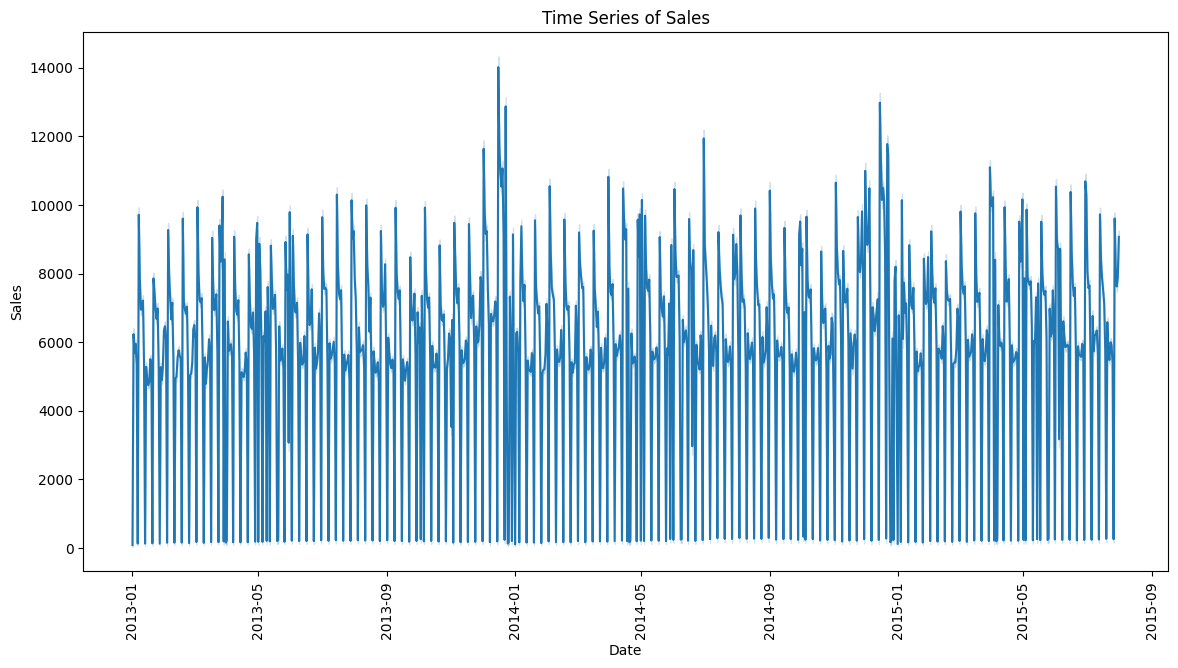

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "Date", y = "Sales",
             data = ross_data)

plt.xticks(rotation = 90)
plt.title("Time Series of Sales")

Text(0.5, 1.0, 'Time Series of Sales Per Customer')

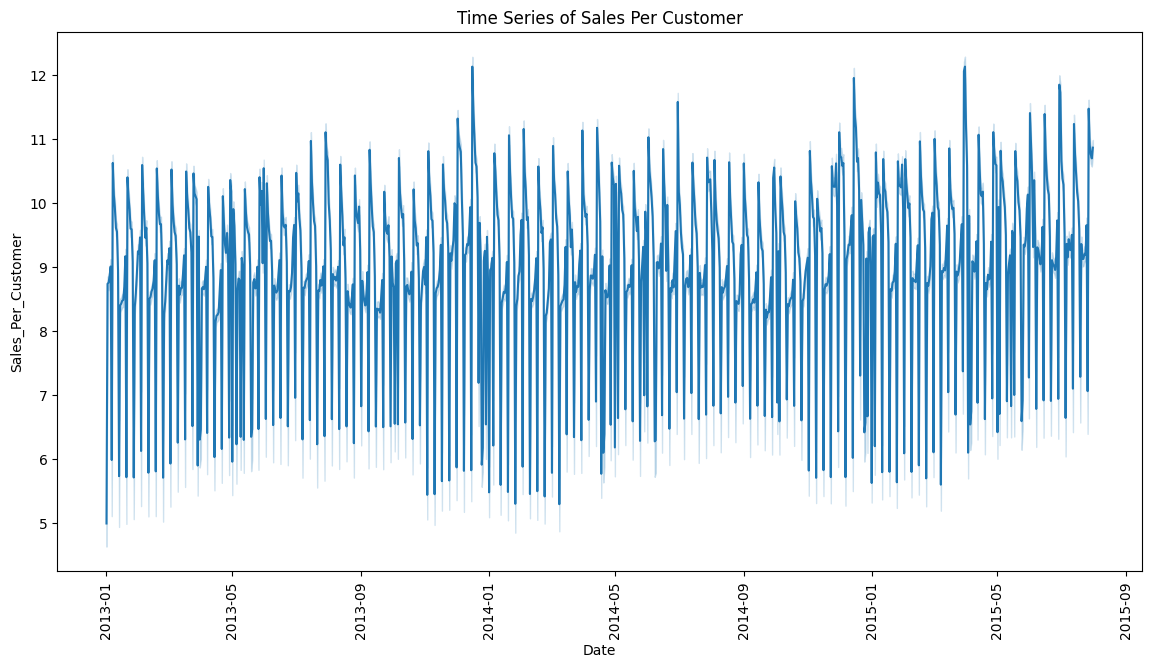

In [ ]:

plt.figure(figsize=(14,7))
sns.lineplot(x = "Date", y = "Sales_Per_Customer",
             data = ross_data)

plt.xticks(rotation = 90)
plt.title("Time Series of Sales Per Customer")

Text(0.5, 1.0, 'Time Series For Year 2013')

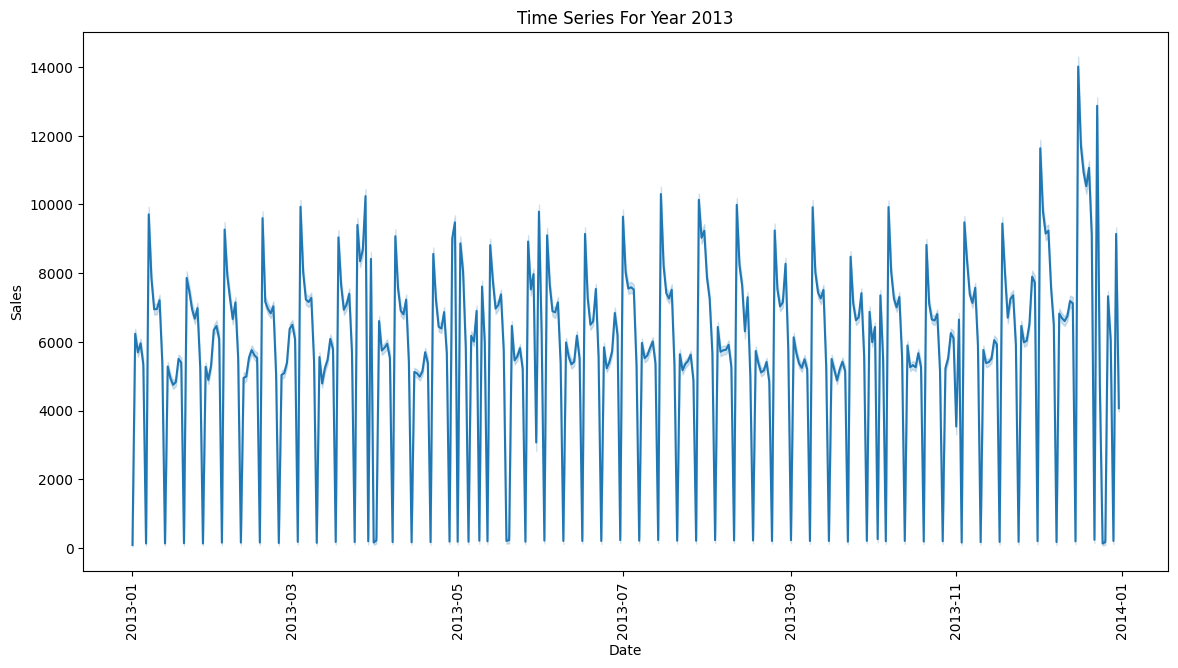

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "Date", y = "Sales",
             data = ross_data[ross_data["Date"].dt.year == 2013])

plt.xticks(rotation = 90)
plt.title("Time Series For Year 2013")

Text(0.5, 1.0, 'Time Series For Year 2014')

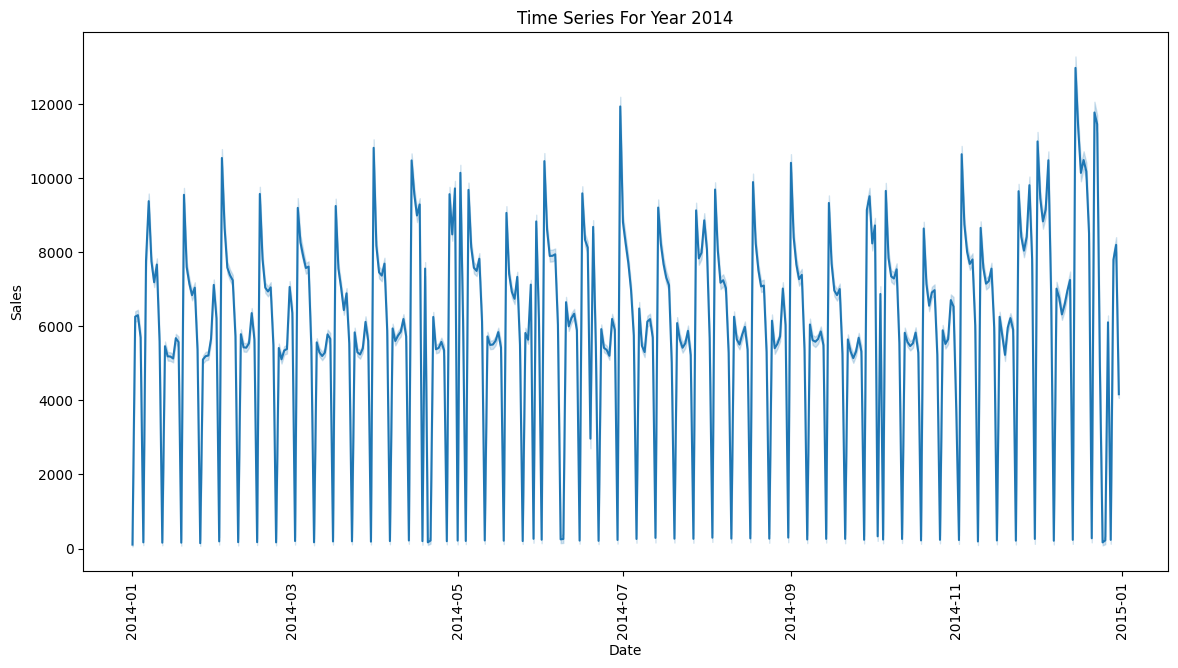

In [ ]:
plt.figure(figsize=(14,7))

sns.lineplot(x = "Date", y = "Sales",
             data = ross_data[ross_data["Date"].dt.year == 2014])

plt.xticks(rotation = 90)
plt.title("Time Series For Year 2014")

Text(0.5, 1.0, 'Time Series For Year 2015')

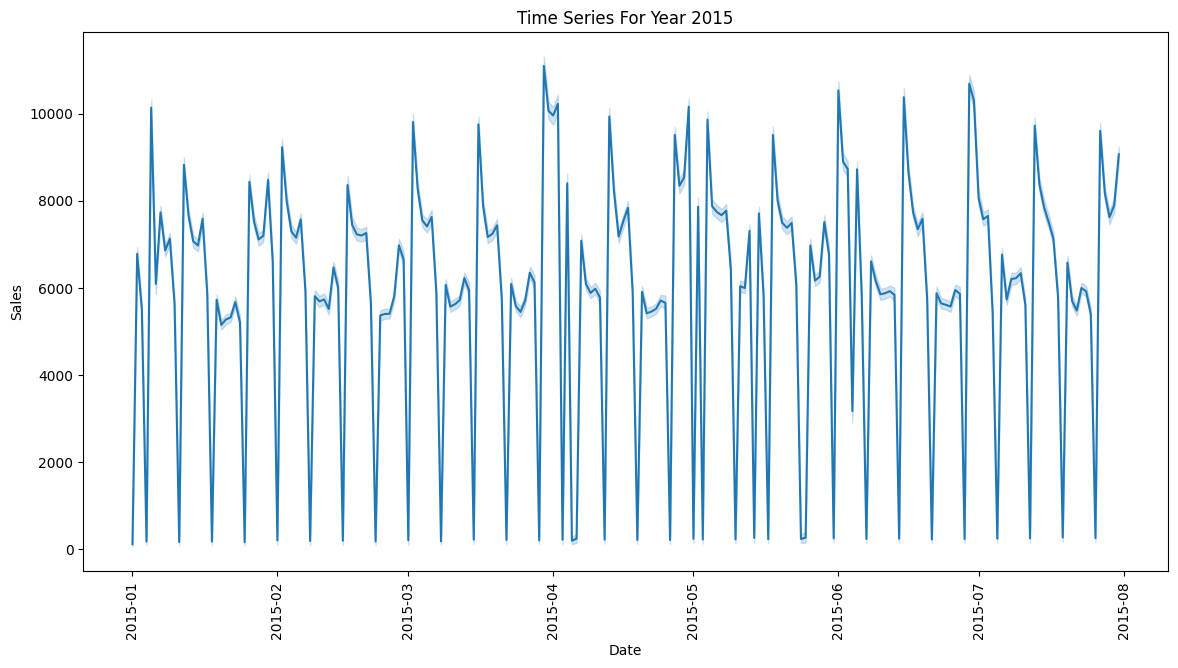

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "Date", y = "Sales",
             data = ross_data[ross_data["Date"].dt.year == 2015])

plt.xticks(rotation = 90)
plt.title("Time Series For Year 2015")

In [ ]:
ross_data["Year"] = ross_data["Date"].dt.year
ross_data["Month"] = ross_data["Date"].dt.month
ross_data["Day"] = ross_data["Date"].dt.day

In [ ]:
def concat_func(x):
  return str(x["Day"]) + "-" + str(x["Month"])
ross_data["Day_Month"] = ross_data.apply(concat_func, axis = 1)

In [ ]:
grp_monthly_sales_ross_data = ross_data.groupby(["Month", "Year"])["Sales"].agg("count").reset_index()
grp_monthly_sales_ross_data.head()

Month  Year  Sales
0      1  2013  34564
1      1  2014  34565
2      1  2015  34565
3      2  2013  31220
4      2  2014  31220

Text(0.5, 1.0, 'Time Series Monthly Data')

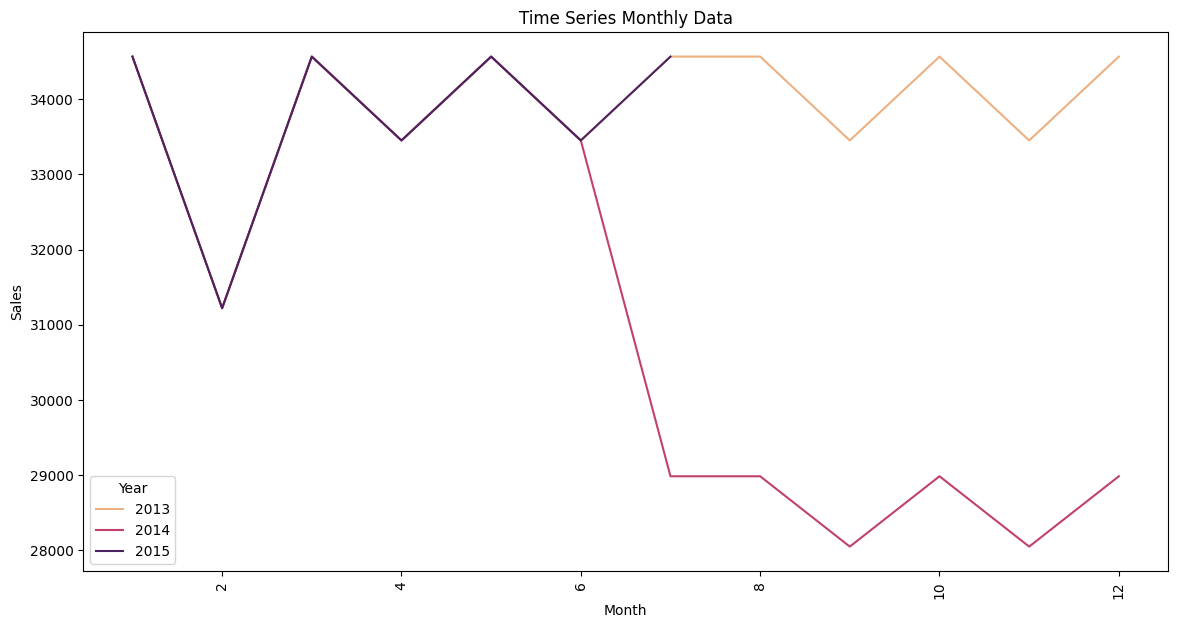

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "Month", y = "Sales", hue = "Year",
             data = grp_monthly_sales_ross_data, palette="flare")

plt.xticks(rotation = 90)
plt.title("Time Series Monthly Data")

###EDA Missing Data Patter

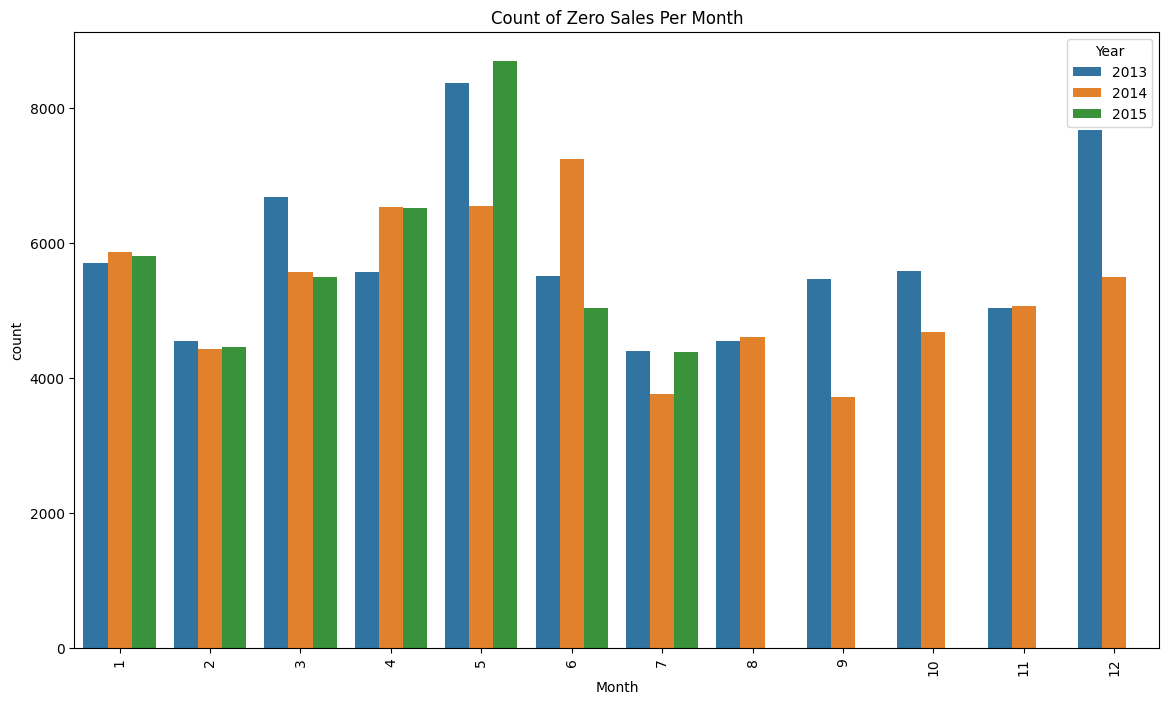

In [ ]:
plt.figure(figsize=(14,8))

sns.countplot(data=ross_data[ross_data.Sales == 0], x="Month", hue = "Year")
plt.xticks(rotation = 90)
plt.title("Count of Zero Sales Per Month")
print()

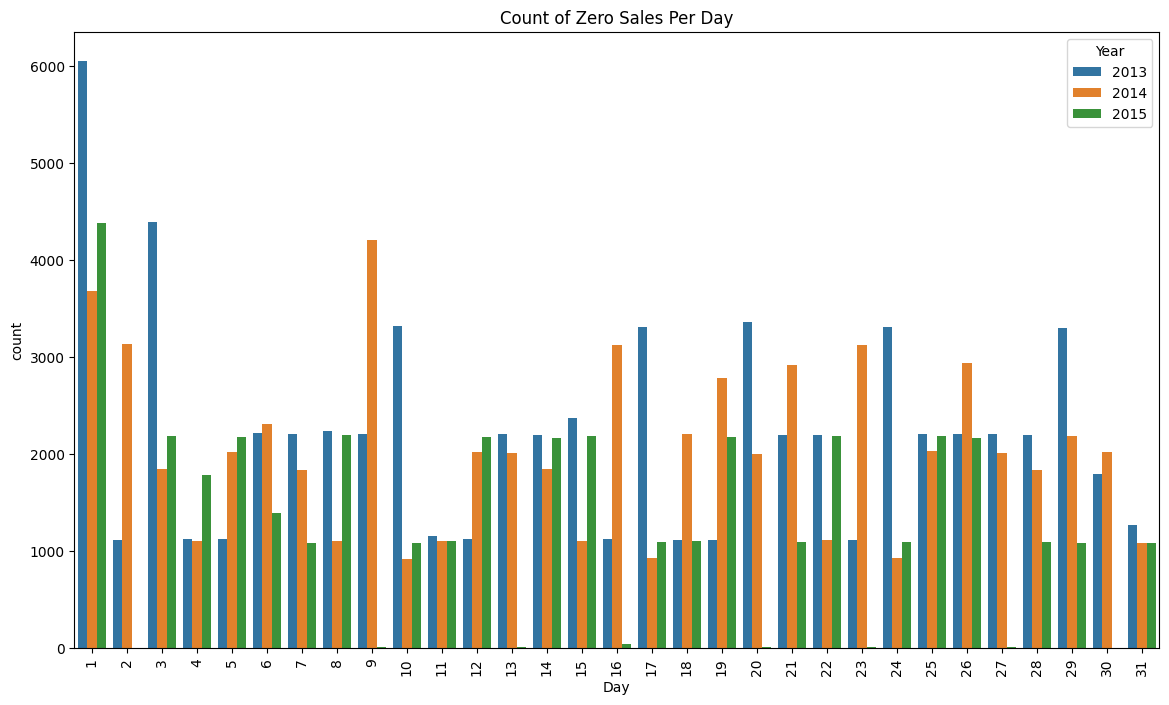

In [ ]:
plt.figure(figsize=(14,8))

sns.countplot(data=ross_data[ross_data.Sales == 0], x="Day", hue = "Year")
plt.xticks(rotation = 90)
plt.title("Count of Zero Sales Per Day")
print()

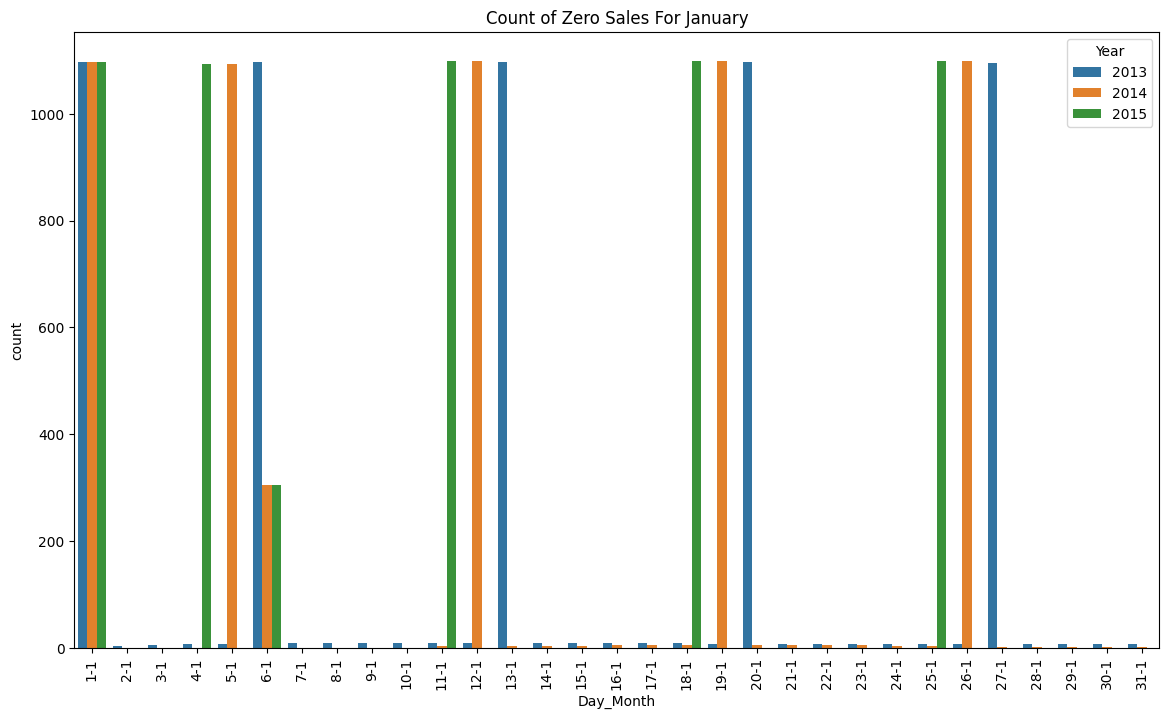

In [ ]:
plt.figure(figsize=(14,8))

sns.countplot(data=ross_data[(ross_data.Sales == 0) & (ross_data.Month == 1)].sort_values("Day"), x="Day_Month", hue = "Year")
plt.xticks(rotation = 90)
plt.title("Count of Zero Sales For January")
print()

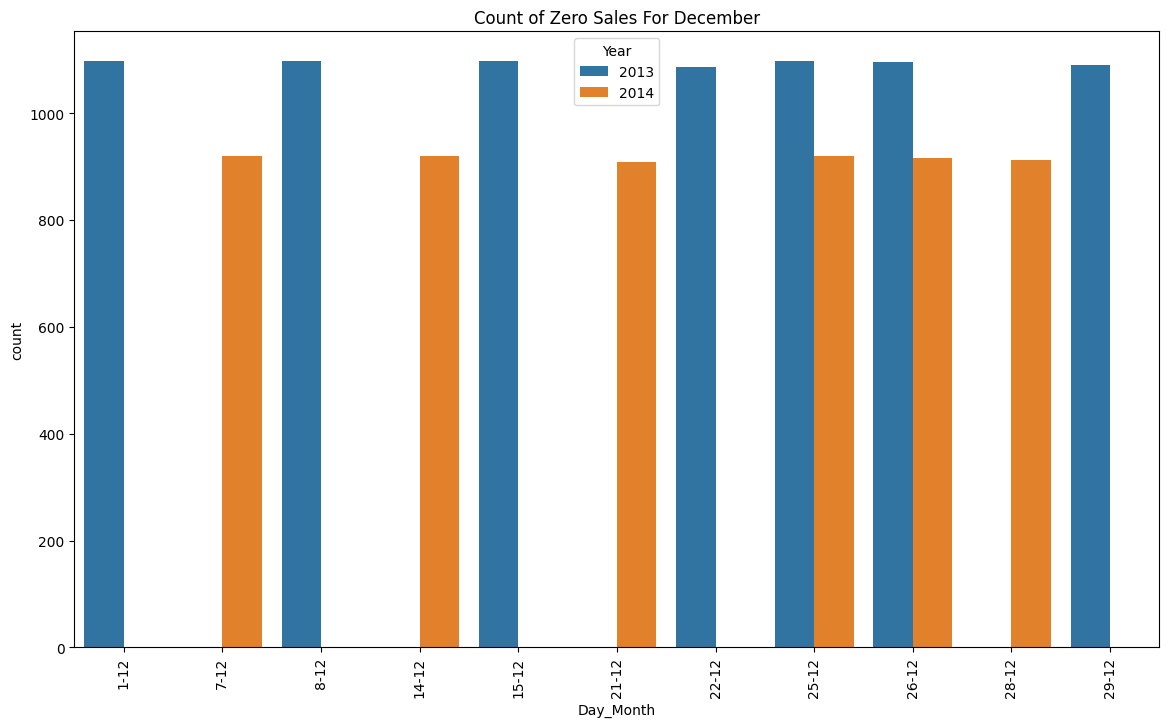

In [ ]:
plt.figure(figsize=(14,8))

sns.countplot(data=ross_data[(ross_data.Sales == 0) & (ross_data.Month == 12)].sort_values("Day"), x="Day_Month", hue = "Year")
plt.xticks(rotation = 90)
plt.title("Count of Zero Sales For December")
print()

### Time Series Plots

In [299]:
ross_data.head()

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
0      1         5 2015-07-31   5263        555    1     1            0   
1      2         5 2015-07-31   6064        625    1     1            0   
2      3         5 2015-07-31   8314        821    1     1            0   
3      4         5 2015-07-31  13995       1498    1     1            0   
4      5         5 2015-07-31   4822        559    1     1            0   

  SchoolHoliday  Sales_Per_Customer  
0             1            9.482883  
1             1            9.702400  
2             1           10.126675  
3             1            9.342457  
4             1            8.626118

In [300]:
ts_ross_data = ross_data.groupby("Date").agg({'Sales': np.sum, 'Customers':np.sum})

In [301]:
ts_ross_data["Sales_Per_Customer"] = ts_ross_data["Sales"] / ts_ross_data["Customers"]

In [302]:
ts_ross_data.head()

Sales  Customers  Sales_Per_Customer
Date                                              
2013-01-01    97235      19491            4.988713
2013-01-02  6949829     834075            8.332379
2013-01-03  6347820     761040            8.340981
2013-01-04  6638954     782137            8.488224
2013-01-05  5951593     687472            8.657215

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition = seasonal_decompose(ts_ross_data['Sales_Per_Customer'], model='additive')

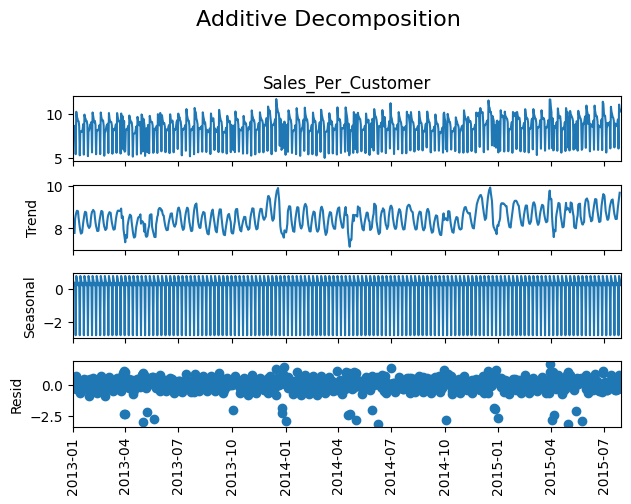

In [ ]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xticks(rotation = 90)
print()

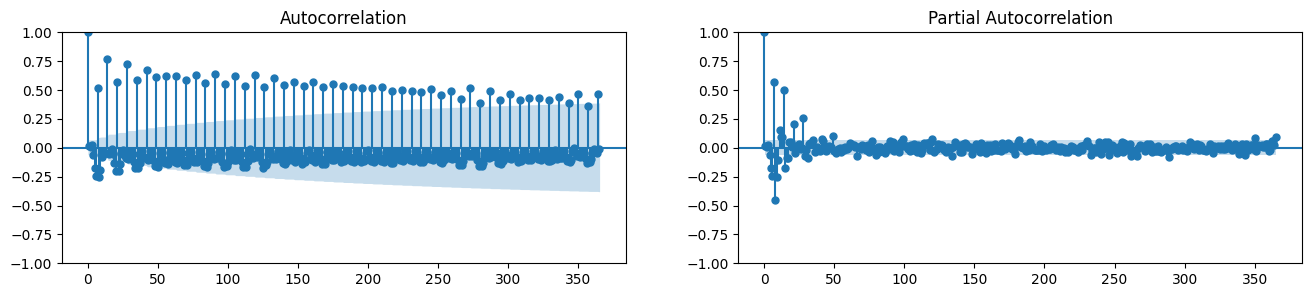

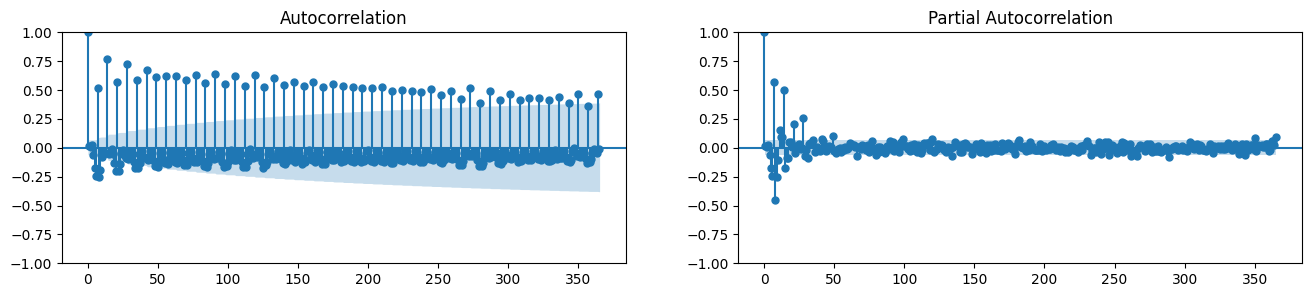

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ts_ross_data['Sales_Per_Customer'].tolist(), lags=365, ax=axes[0])
plot_pacf(ts_ross_data['Sales_Per_Customer'].tolist(), lags=365, ax=axes[1])

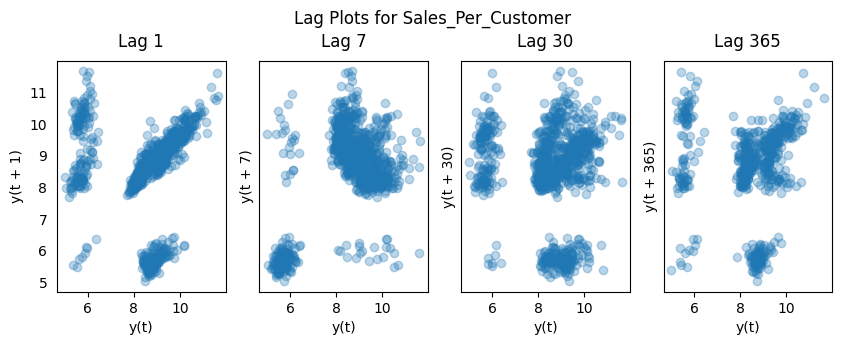

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

date_value = [1, 7, 30, 365]
# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ts_ross_data['Sales_Per_Customer'], lag=date_value[i], ax=ax, alpha = 0.3)
    ax.set_title('Lag ' + str(date_value[i]))

fig.suptitle('Lag Plots for Sales_Per_Customer', y=1.05)
plt.show()

In [ ]:
ts_ross_data["Sales_Per_Customer"].head()

Date
2013-01-01    4.988713
2013-01-02    8.332379
2013-01-03    8.340981
2013-01-04    8.488224
2013-01-05    8.657215
Name: Sales_Per_Customer, dtype: float64

In [329]:
ts_ross_data["Year"] = ts_ross_data.index.year

In [304]:
ts_ross_data["Sales_Per_Customer_Year_Back"] = ts_ross_data["Sales_Per_Customer"].shift(365)

In [305]:
ross_data["Sales_Per_Customer_Year_Back"] = ross_data["Sales_Per_Customer"].shift(365)

<Axes: xlabel='Sales_Per_Customer', ylabel='Sales_Per_Customer_Year_Back'>

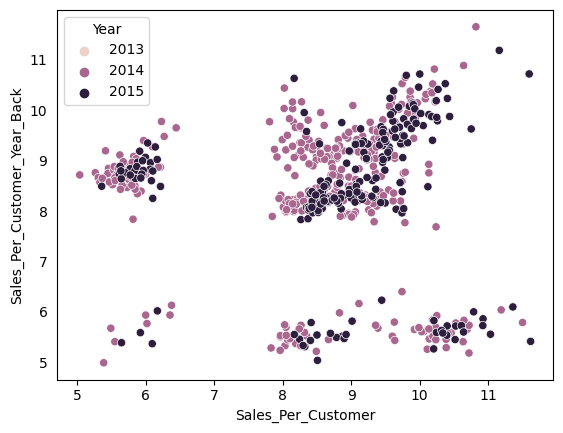

In [330]:
sns.scatterplot(data = ts_ross_data, x = "Sales_Per_Customer", y = "Sales_Per_Customer_Year_Back", hue = "Year")

In [334]:
high_sales_low_back_sales_index = ts_ross_data[(ts_ross_data["Sales_Per_Customer"] > 8) & (ts_ross_data["Sales_Per_Customer_Year_Back"] < 6) ].index

In [335]:
high_sales_low_back_sales_index = ts_ross_data[(ts_ross_data["Sales_Per_Customer"] < 6) & (ts_ross_data["Sales_Per_Customer_Year_Back"] > 8) ].index

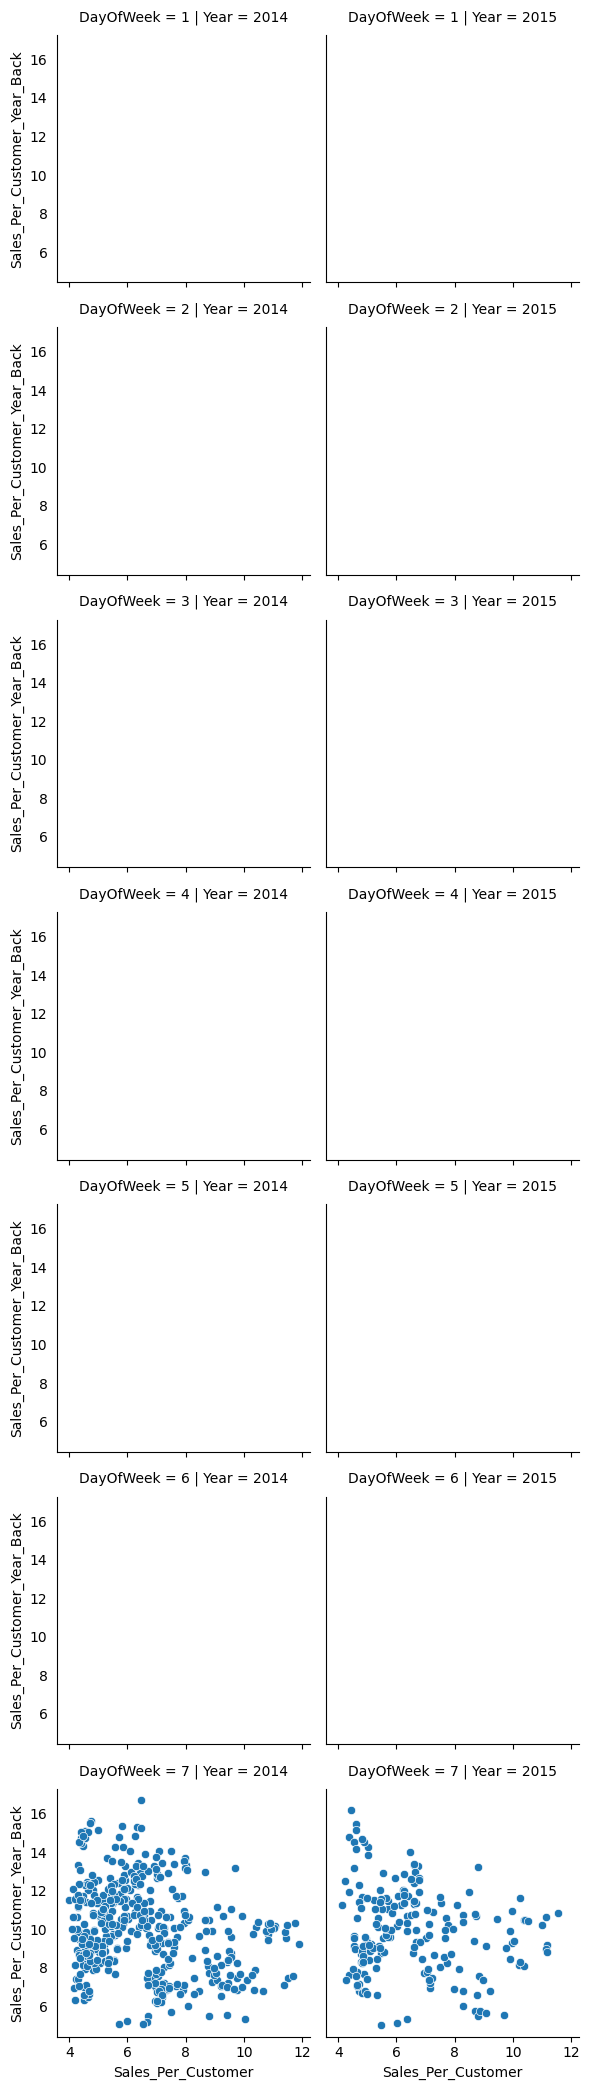

In [339]:
g = sns.FacetGrid(ross_data[ross_data.Date.isin(high_sales_low_back_sales_index)], col="Year",  row="DayOfWeek")
g.map(sns.scatterplot, "Sales_Per_Customer", "Sales_Per_Customer_Year_Back")

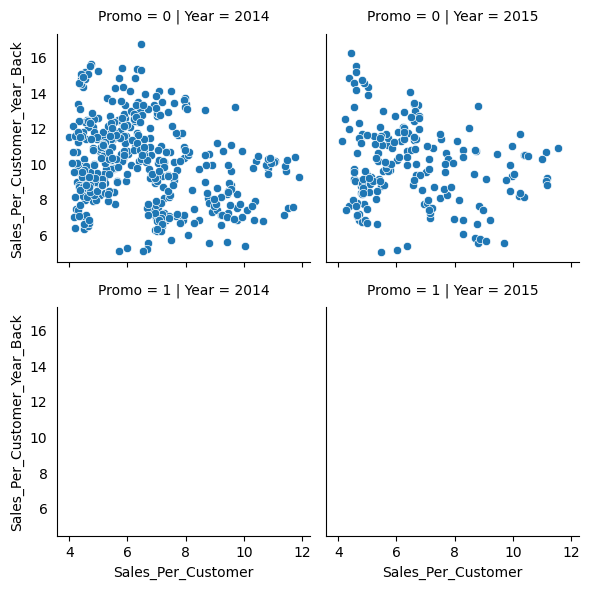

In [336]:
g = sns.FacetGrid(ross_data[ross_data.Date.isin(high_sales_low_back_sales_index)], col="Year",  row="Promo")
g.map(sns.scatterplot, "Sales_Per_Customer", "Sales_Per_Customer_Year_Back")

### Forecast Model Building Process

In [27]:
train_ross_data = ross_data.groupby("Date").agg({'Sales': np.sum, 'Customers':np.sum, 'Promo': 'first', 'DayOfWeek': 'first' })

In [28]:
train_ross_data.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25',
               '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [29]:
train_ross_data["Sales_Per_Customer"] = train_ross_data["Sales"] / train_ross_data["Customers"]

In [30]:
train_ross_data["Sales_Per_Customer_Year_Back"] = train_ross_data["Sales_Per_Customer"].shift(365)

In [31]:
train_ross_data.columns

Index(['Sales', 'Customers', 'Promo', 'DayOfWeek', 'Sales_Per_Customer',
       'Sales_Per_Customer_Year_Back'],
      dtype='object')

In [ ]:
"""
Based on EDA & Feature Engineering

We will try to build a model using to predict "Sales_Per_Customer" for a month period
DayOfWeek : Day of the week when the sales occurred
Promo : Whether there was a promotion
Sales_Per_Customer_Year_Back: What was sales per customer last year
"""

In [36]:
ts_train_ross_data = train_ross_data.dropna()

In [37]:
len(ts_train_ross_data)

577

##### TimeSeries Cross Validation

In [39]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=11, test_size=30)

In [40]:
for i, (train_index, test_index) in enumerate(tscv.split(ts_train_ross_data)):
  print(f"Fold {i}:")
  print(f"  Train: index={len(train_index)}")
  print(f"  Test:  index={len(test_index)}")

Fold 0:
  Train: index=247
  Test:  index=30
Fold 1:
  Train: index=277
  Test:  index=30
Fold 2:
  Train: index=307
  Test:  index=30
Fold 3:
  Train: index=337
  Test:  index=30
Fold 4:
  Train: index=367
  Test:  index=30
Fold 5:
  Train: index=397
  Test:  index=30
Fold 6:
  Train: index=427
  Test:  index=30
Fold 7:
  Train: index=457
  Test:  index=30
Fold 8:
  Train: index=487
  Test:  index=30
Fold 9:
  Train: index=517
  Test:  index=30
Fold 10:
  Train: index=547
  Test:  index=30


In [41]:
ts_train_ross_data.columns

Index(['Sales', 'Customers', 'Promo', 'DayOfWeek', 'Sales_Per_Customer',
       'Sales_Per_Customer_Year_Back'],
      dtype='object')

In [43]:
ts_train_ross_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577 entries, 2014-01-01 to 2015-07-31
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Sales                         577 non-null    int64   
 1   Customers                     577 non-null    int64   
 2   Promo                         577 non-null    category
 3   DayOfWeek                     577 non-null    category
 4   Sales_Per_Customer            577 non-null    float64 
 5   Sales_Per_Customer_Year_Back  577 non-null    float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 24.1 KB


In [42]:
X = ts_train_ross_data[['Promo', 'DayOfWeek', 'Sales_Per_Customer_Year_Back']]
y = ts_train_ross_data["Sales_Per_Customer"]

In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Promo', 'DayOfWeek']

preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

In [76]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

ridge_param_grid = {
    "reg__alpha": [1e-10, 1e-5, 1e-2, 1]
}

lm_sales_reg = Pipeline([
    ("encode",preprocessor),
    ("reg", Ridge(random_state = 42))
])

lm_model_gv = GridSearchCV(lm_sales_reg,
                           ridge_param_grid,
                           cv = tscv)


In [77]:
print(lm_model_gv)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=11, test_size=30),
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Promo',
                                                                          'DayOfWeek'])],
                                                          verbose_feature_names_out=False)),
                                       ('reg', Ridge(random_state=42))]),
             param_grid={'reg__alpha': [1e-10, 1e-05, 0.01, 1]})


In [78]:
lm_model_gv.fit(X, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=11, test_size=30),
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Promo',
                                                                          'DayOfWeek'])],
                                                          verbose_feature_names_out=False)),
                                       ('reg', Ridge(random_state=42))]),
             param_grid={'reg__alpha': [1e-10, 1e-05, 0.01, 1]})

In [79]:
lm_model_gv.best_params_

{'reg__alpha': 1e-10}

In [81]:
lm_model_gv.best_estimator_

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Promo', 'DayOfWeek'])],
                                   verbose_feature_names_out=False)),
                ('reg', Ridge(alpha=1e-10, random_state=42))])

In [80]:
pd.DataFrame(lm_model_gv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006232      0.002062         0.003599        0.000487   
1       0.005507      0.000379         0.003350        0.000281   
2       0.005562      0.000403         0.003519        0.000442   
3       0.005640      0.000379         0.003520        0.000419   

  param_reg__alpha                 params  split0_test_score  \
0              0.0  {'reg__alpha': 1e-10}           0.747080   
1          0.00001  {'reg__alpha': 1e-05}           0.747080   
2             0.01   {'reg__alpha': 0.01}           0.747050   
3                1      {'reg__alpha': 1}           0.743857   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.909773           0.947991           0.757074           0.931370   
1           0.909773           0.947991           0.757074           0.931370   
2           0.909832           0.947975           0.756941           0.931392   
3           0.914910           0.946100           0.744221           0.933068   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.897889           0.818404           0.568653           0.734941   
1           0.897889           0.818404           0.568653           0.734941   
2           0.897901           0.818392           0.568663           0.734971   
3           0.898808           0.817023           0.569380           0.737668   

   split9_test_score  split10_test_score  mean_test_score  std_test_score  \
0           0.864142            0.858319         0.821421        0.107024   
1           0.864142            0.858319         0.821421        0.107024   
2           0.864136            0.858309         0.821415        0.107034   
3           0.863373            0.857232         0.820513        0.108001   

   rank_test_score  
0                1  
1                2  
2                3  
3                4

In [84]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y, lm_model_gv.best_estimator_.predict(X))

print(f"MedAE on training set :{mae_train:.2f} $")

MedAE on training set :0.27 $


In [92]:
lm_sales_reg[0].get_feature_names_out()

array(['Promo_0', 'Promo_1', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Sales_Per_Customer_Year_Back'], dtype=object)

In [99]:
lm_model_gv.best_estimator_[-1].coef_

array([-0.6296253 ,  0.63005258,  1.32194431,  0.23035351,  0.1479752 ,
       -0.08435746,  0.07248852,  0.7391544 , -2.4294359 ,  0.25528677])

In [100]:
feature_names = lm_sales_reg[0].get_feature_names_out()

coefs = pd.DataFrame(
    lm_model_gv.best_estimator_[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

Coefficients
Promo_0                          -0.629625
Promo_1                           0.630053
DayOfWeek_1                       1.321944
DayOfWeek_2                       0.230354
DayOfWeek_3                       0.147975
DayOfWeek_4                      -0.084357
DayOfWeek_5                       0.072489
DayOfWeek_6                       0.739154
DayOfWeek_7                      -2.429436
Sales_Per_Customer_Year_Back      0.255287

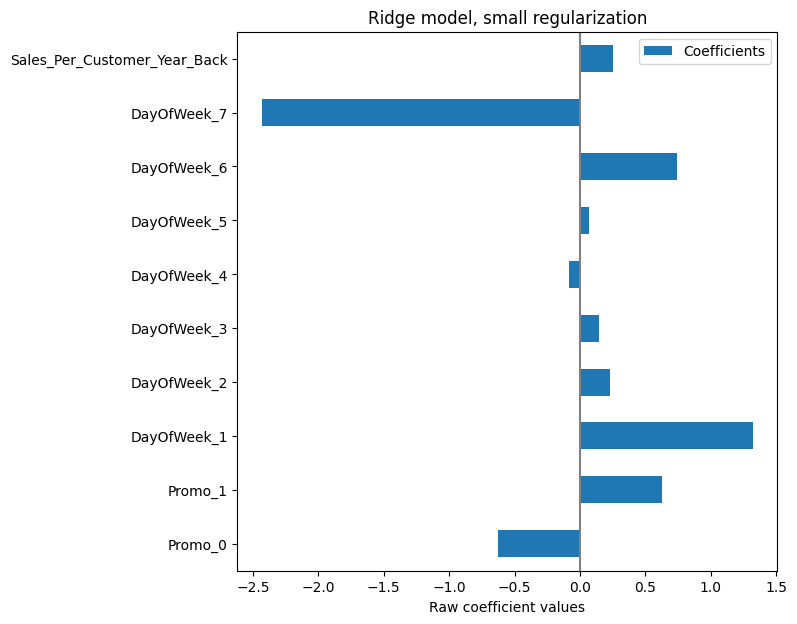

In [101]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Fit the best model on entire dataset

In [125]:
lm_model_gv.best_estimator_.fit(X, y)

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Promo', 'DayOfWeek'])],
                                   verbose_feature_names_out=False)),
                ('reg', Ridge(alpha=1e-10, random_state=42))])

###Test Data & Predict Future

In [112]:
test_df = pd.DataFrame({"Date": pd.date_range(start='2015-08-01', periods=30)})
test_df["Date"] = pd.to_datetime(test_df.Date, format='%Y-%m-%d', errors='ignore')
test_df.head()

Date
0 2015-08-01
1 2015-08-02
2 2015-08-03
3 2015-08-04
4 2015-08-05

In [113]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    30 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 368.0 bytes


In [116]:
test_df["Promo"] = 1
test_df["DayOfWeek"] = test_df["Date"].apply(lambda x: x.weekday() + 1)

In [123]:
test_df["Sales_Per_Customer_Year_Back"] = ts_train_ross_data.tail(30)["Sales_Per_Customer"].values

In [124]:
test_df.head()

Date  Promo  DayOfWeek  Sales_Per_Customer_Year_Back
0 2015-08-01      1          6                      9.771403
1 2015-08-02      1          7                      9.752983
2 2015-08-03      1          1                      9.064658
3 2015-08-04      1          2                      5.637875
4 2015-08-05      1          3                      8.896369

In [130]:
test_df["forecast_values"] = lm_model_gv.predict(test_df[['Promo', 'DayOfWeek', 'Sales_Per_Customer_Year_Back']])

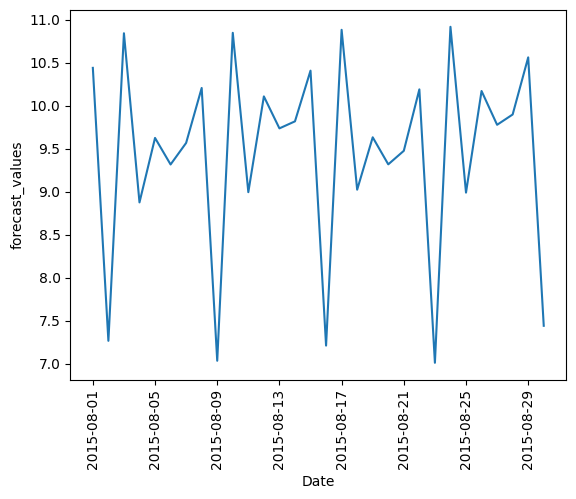

In [134]:
sns.lineplot(data = test_df, x = "Date", y = "forecast_values")
plt.xticks(rotation =90)
print()